# Module 6: Regression Basics

In this module, you will learn how to fit and plot a regression line using R. 

Functions introduced in this module: 
- lm()
- abline()
- resid()

## Review of Scatterplots

Before we can do any analysis, we have to import our data to R. In this module, we will work with a new dataset that focuses on a bicycle sharing system that operates in and around Washinton DC in the US. This dataset contains several variables over 2 years, but we focus on just the average daily temperature and number of bicycles used over 100 days. Temperature is measured in degrees Celsius. Both temperature and number of bicycles are numeric variables.

We will use the "read.csv()" function to import the bicycle dataset to R. The name of the dataset file is "Bikes.csv". This dataset contains variable names, so we could set the "header" input equal to "TRUE", or just leave it out. Let's import our dataset now, and call it "data.bikes".

In [1]:
data.bikes = read.csv(file = "Bikes.csv")

Let's check that we imported the dataset correctly by printing out the first few lines using the "head()" function.

In [2]:
head(data.bikes)

Temp,Bikes
14.1,985
14.9,801
8.1,1349
8.2,1562
9.3,1600
8.4,1606


This looks right. Now we can move on.

Now that we have imported our data, let's make a scatterplot.

We saw in Module 4 that scatterplots are made in R with the "plot()" function. The "plot()" function has 2 main inputs, "x" and "y". These inputs are the variables that go on the x-axis (horizontal) and y-axis (vertical). We can also use the optional inputs "main", "xlab" and "ylab" to add a title, x-axis label and y-axis label respectively.

Let's make a scatterplot with temperature ("Temp") on the y-axis and number of bicycles ("Bikes") on the x-axis. We should also include appropriate axis labels and a title. Remember that we access the temperature and number of bicycles from inside "data.bikes" by using "$".

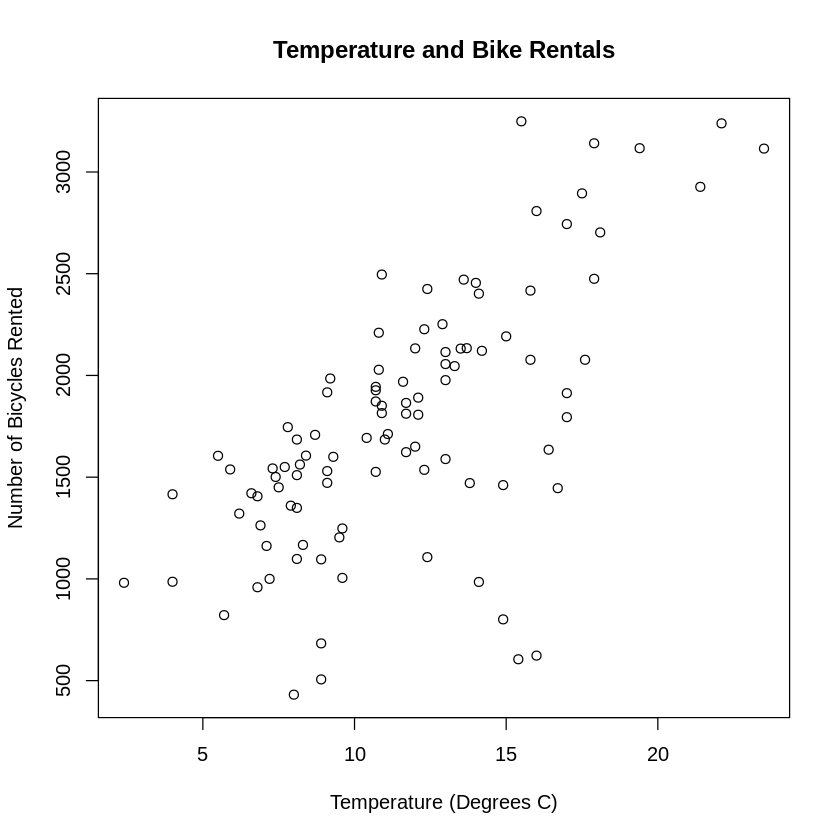

In [3]:
plot(x=data.bikes$Temp, y=data.bikes$Bikes, xlab="Temperature (Degrees C)", ylab = "Number of Bicycles Rented", 
     main = "Temperature and Bike Rentals")

## Fitting Regression Lines

Next, we would like to determine if there is a relationship between temperature and number of bicycles rented. Linear regression is a powerful tool for investigating this question. We will use temperature as a predictor variable and number of bicycles rented as a response variable. That is, we are going to try to estimate the number of bicycles rented based on the temperature. 

Our regression analysis starts by fitting a regression line. This means that we must calculate the slope and intercept of that line. The bicycle dataset has 100 observations, so we definitely do not want to calculate the slope and intercept by hand.

Fortunately, R has a function that calculates slopes and intercepts for us. This function is called "lm()", which stands for Linear Model. The regression line is one type of linear model. 

There are two inputs for the "lm()" function. The first is called a formula. A formula is how we tell R that we want to investigate whether the number of bicycles rented depends on the temperature. The symbol in R for "depends on" is "~", which is called a tilde. Therefore, regression formulas in R are always written as the response variable, then a "~", then the predictor variable. That is, the generic R formula for a regression model is "response ~ predictor".

The second input for the "lm()" function is called "data", and it is the data frame that contains the variables we are studying. 

In order to investigate whether the number of bicycles depends on the temperature, we need to set formula equal to "Bikes ~ Temp" (this says that the number of bicycles rented depends on the temperature). These variables are contained in our data frame called "data.bikes", so we need to set "data" equal to "data.bikes". Let's do this now and call the results reg.bikes.

In [4]:
reg.bikes = lm(formula = Bikes ~ Temp, data = data.bikes)

*R Topic: The output we get from "lm()" is called an "lm object". Objects in R are variables that contain sub-variables called attributes. A data frame is another example of an object, where the attributes are the columns of our dataset. We can access the attributes of an lm object using "$", but there are functions that access this information and present it in a more managable way. It is good practice to use functions to access the attributes of an object whenever possible.*

We have now fit a regression line, but hasn't actually told us what the slope and intercept are. We have to print our new object to see its results. Let's do this now.

In [5]:
print(reg.bikes)


Call:
lm(formula = Bikes ~ Temp, data = data.bikes)

Coefficients:
(Intercept)         Temp  
     604.66        99.66  



The part after "Call:" in this output tells you what code you wrote to fit this regression model. This can be helpful to make sure that you wrote your formula correctly and that you specified the correct data frame. 

The really interesting part of this output is after "Coefficients". This tells you the value of your regression coefficients, another name for the slope and intercept. The value of the intercept is the one under "(Intercept)". Our intercept is equal to 604.66. 

The value of our slope is under "Temp", which is equal to 99.66. In R, the slope of a regression line is always labelled with the name of your predictor variable.

## Plotting Regression Lines

We have now fit a regression line to the bicycle data, but we only have numbers for the slope and intercept. This is an important first step, but it doesn't tell us much unless we can see the regression line. Conveniently, R is also very good at plotting regression lines.

Your first instinct may be to use the plot function on the lm object we made in the last section (called "reg.bikes"). This approach is useful in more advanced settings, but it provides more information than we need. What we really want to do is add our regression line to a scatterplot of temperature and number of bicycles rented. The function that does this in R is called "abline()" (because it can make lines joining point "a" to point "b", whatever points "a" and "b" are).

The "abline()" function in R can be used in several different ways, each with different inputs. Because we are working with an lm object, we will use the input called "reg". If we set "reg" equal to an lm object, then the "abline()" function will automatically add that regression line to the last scatterplot you made.

Let's plot the regression line for the bike sharing example. First, we make a new scatterplot with number of bikes rented on the y-axis and temperature on the x-axis. We should make sure that our title describes the regression line we will be adding. Next, we add the regression line that we calculated using "lm()". To do this, we use the "abline()" function, setting "reg" equal to the lm object "reg.bikes".

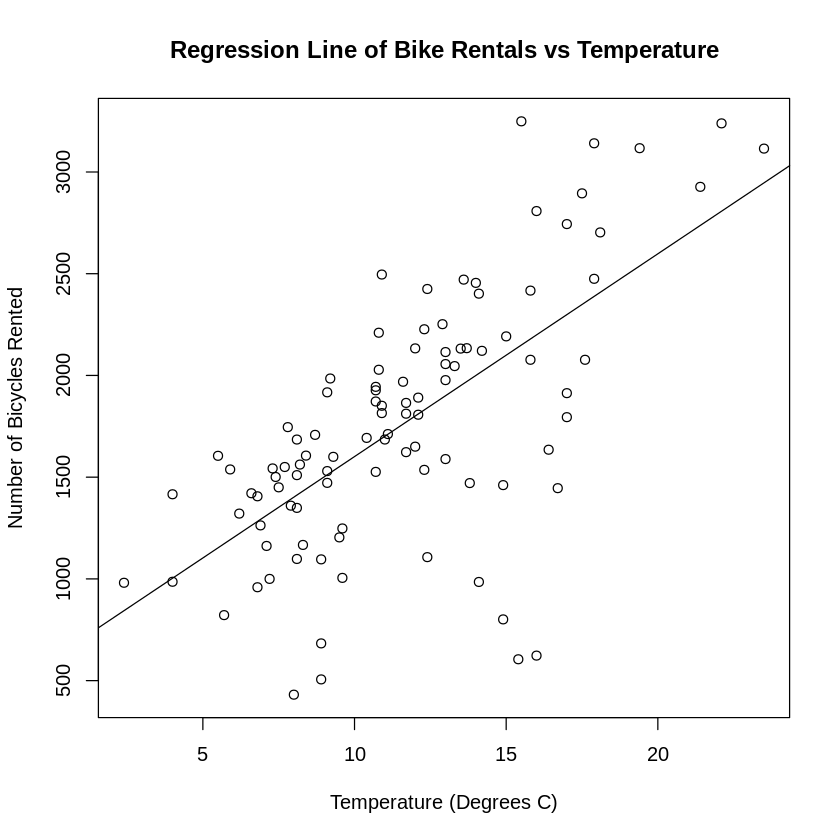

In [6]:
plot(x=data.bikes$Temp, y=data.bikes$Bikes, xlab="Temperature (Degrees C)", ylab = "Number of Bicycles Rented", 
     main = "Regression Line of Bike Rentals vs Temperature")
abline(reg = reg.bikes)

Notice that we make our scatterplot and add our regression line in the same cell. If we split these functions across 2 cells, the "abline()" function won't have a scatterplot to add the regression line to.

## Residual Plots

Residuals are a useful tool for checking how well our regression line fits the data. Plotting the residuals allows us to check many of the assumptions required for the regression line to be appropriate. Remember that the residual for each observation is its value for the response variable minus its predicted value obtained from the regression line. We could calculate these manually, but R has a function that does it for us.

The function in R for calculating residuals is called "resid()". The "resid()" function has only 1 input, called "object", and this is the regression object that we want to get residuals for. We then store these residuals under another name.

Let's get the residuals from our "reg.bikes" regression object, and call the results "resid.bikes". We will also print the first few residuals to make sure nothing looks weird.

In [7]:
resid.bikes = resid(reg.bikes)
head(resid.bikes)

1           2           3           4           5           6 
-1024.92179 -1288.65273   -62.93974   140.09390    68.46385   164.16116

Notice that some of these residuals are positive and some are negative. This is expected. Positive residuals correspond to points above the regression line, and negative residuals correspond to points below the line.

Looking at the values of the residuals doesn't tell us much. What we really want to do is plot them using the "plot()" function. Typically, we put residuals on the y-axis, and the predictor variable on the x-axis. The resulting graph is called a residual plot.

Let's make a residual plot for our regression object, "reg.bikes". We will put temperature, "data.bikes$Temp", on the x-axis, and the residuals, "resid.bikes", on the y-axis.

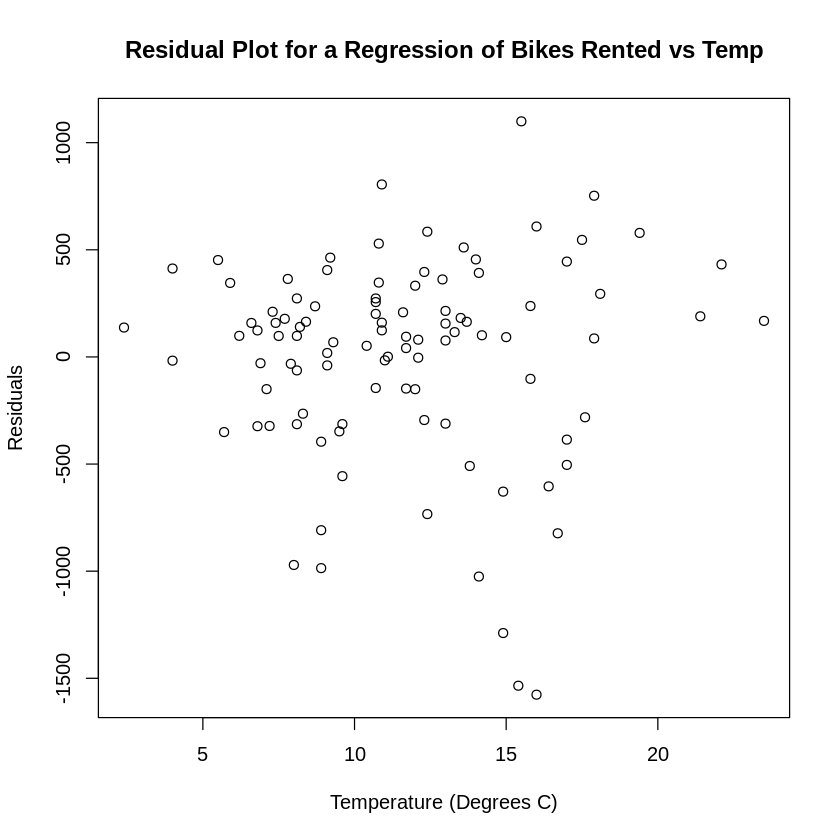

In [8]:
plot(x = data.bikes$Temp, y=resid.bikes, xlab="Temperature (Degrees C)", ylab = "Residuals",
    main = "Residual Plot for a Regression of Bikes Rented vs Temp")

You will often see residual plots with a horizontal line at 0. This is because the mean of the residuals is always 0. The line helps us judge the residuals' departure from this mean.

We can use the "abline()" function again to add a horizontal line to our plot. Remember that we used the "reg" input with this function to plot a regression line. Another input for "abline()" is called "h". The "h" input plots a horizontal line at the value you specify. 

Since "abline()" only adds lines to existing plots created in the same cell, we will need to make a plot for "abline()" to add to.

Let's re-make the residual plot from the last cell and use "abline()" with "h" set to zero to add a horizontal line at 0.

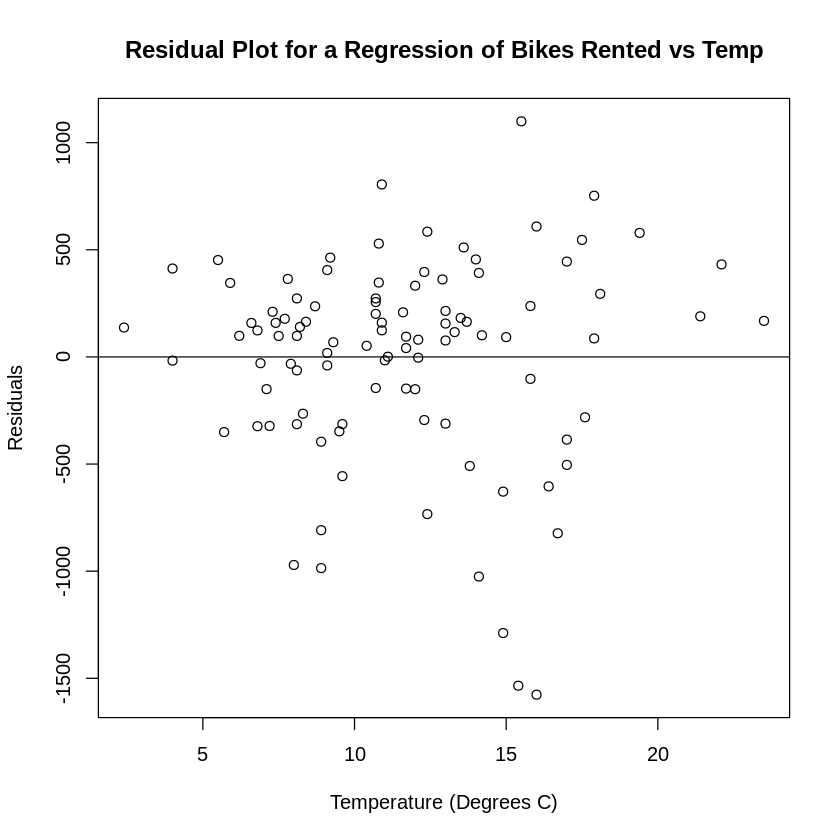

In [9]:
plot(x = data.bikes$Temp, y=resid.bikes, xlab="Temperature (Degrees C)", ylab = "Residuals",
    main = "Residual Plot for a Regression of Bikes Rented vs Temp")
abline(h = 0)

Do you notice any potential violations of the assumptions for regression?